<h1 style="color:darkred; font-family:candara; font-size:400%; text-align:center;"> 
    COVID-19
</h1>

***

This notebook will study my own questions about the coronavirus phenomenon that has alarmed the world and that has waken us up about the implication of pandemias in a globalised world. 
[In this link](https://systems.jhu.edu/research/public-health/ncov/) you can find a nice review of how these events have developed since its first appearance.

I think (and hope) that the world won't devolve into xenofobic, rigidly separate countries with hard borders, hence after this analysis, the most important message to take home is that nations should act more tightly and in a synchronised manner when the next pandemia rises.

Whilst looking at the great map done by the [John Hopkins University](https://systems.jhu.edu/research/public-health/ncov/), I was left with so many more questions than answers about many details of this illness and how it is affecting each country. 
Hopefully some indagation could help understand better the spread and the impact of this disease.
<br><br>
<a href="https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">
    <img src="images/COVID-19_global-cases.png" alt="COVID-19" width="650" >
</a>

*Source: Dong E, Du H, Gardner L. [An interactive web-based dashboard to track COVID-19 in real time](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6). Lancet Infect Dis; published online Feb 19, and retrieved Apr 1, 2020. https://doi.org/10.1016/S1473-3099(20)30120-1.*

Hopefully some indagation could help understand better the spread and the impact of this disease.

The data used here was taken from the [**John Hopkins University data on GitHub**](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data), which in turn is compiled from different sources. This database is updated once a day.

## Imports

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import gridspec
# Interactive imports:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.dates import DateFormatter

In [2]:
urlconfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urldeaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
urlrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df = pd.read_csv(urlconfirmed, error_bad_lines=False)
deaths = pd.read_csv(urldeaths, error_bad_lines=False)
recov = pd.read_csv(urlrecovered, error_bad_lines=False)

In [ ]:
# #--------- Melting the recov and creating columns and rows
# recov = pd.melt(recov, id_vars=recov.iloc[:,:3].columns.tolist(), value_vars=recov.iloc[:,3:].columns.tolist(), var_name='date' )
# recov.date = pd.to_datetime(recov.date, format='%m/%d/%y') # %y deals with only a 2 digit year
# recov = recov.sort_values(by=['countryregion', 'date']) # Much better to have them ordered by country
# #--------- Create World entry with the sum of all countries (except China! as we'll discuss😊)
# sum_of_countries_recov = recov[recov.countryregion!='China'].groupby('date').value.sum()
# frame_recov = { 'countryregion': 'World', 'date':sum_of_countries_recov.index, 'value': sum_of_countries_recov.values} 
# recov = pd.concat([recov, pd.Dataframe_recov(frame_recov) ], ignore_index=True, sort=False)
# #--------- Obtaining the difference from day to day (this can be done easily thanks to the order we have indicated) 👌
# recov['delta'] = recov.iloc[:,3:].diff().value

In [3]:
#--------- Cosmetic changes
df = df.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
recov = recov.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
deaths = deaths.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #

latlon = df[['countryregion', 'lat', 'lon']] # We have to save lat and long 
# I am not interested in regions of the US. which seems to be the only one with meaningful province/state
df = df.groupby('countryregion', as_index=False).sum()
recov = recov.groupby('countryregion', as_index=False).sum()
deaths = deaths.groupby('countryregion', as_index=False).sum()

#--------- Melting the df and creating columns and rows
df = pd.melt(df, id_vars=df.iloc[:,:3].columns.tolist(), value_vars=df.iloc[:,3:].columns.tolist(), var_name='date' )
df.date = pd.to_datetime(df.date, format='%m/%d/%y') # %y deals with only a 2 digit year
df = df.sort_values(by=['countryregion', 'date']) # Much better to have them ordered by country
deaths = pd.melt(deaths, id_vars=deaths.iloc[:,:3].columns.tolist(), value_vars=deaths.iloc[:,3:].columns.tolist(), var_name='date' )
deaths.date = pd.to_datetime(deaths.date, format='%m/%d/%y') # %y deals with only a 2 digit year
deaths = deaths.sort_values(by=['countryregion', 'date']) # Much better to have them ordered by country
recov = pd.melt(recov, id_vars=recov.iloc[:,:3].columns.tolist(), value_vars=recov.iloc[:,3:].columns.tolist(), var_name='date' )
recov.date = pd.to_datetime(recov.date, format='%m/%d/%y') # %y deals with only a 2 digit year
recov = recov.sort_values(by=['countryregion', 'date']) # Much better to have them ordered by country
#--------- Create World entry with the sum of all countries (except China! as we'll discuss😊)
sum_of_countries = df[df.countryregion!='China'].groupby('date').value.sum()
frame = { 'countryregion': 'World', 'date':sum_of_countries.index, 'value': sum_of_countries.values} 
df = pd.concat([df, pd.DataFrame(frame) ], ignore_index=True, sort=False)
sum_of_countries_deaths = deaths[deaths.countryregion!='China'].groupby('date').value.sum()
frame_deaths = { 'countryregion': 'World', 'date':sum_of_countries_deaths.index, 'value': sum_of_countries_deaths.values} 
deaths = pd.concat([deaths, pd.DataFrame(frame_deaths) ], ignore_index=True, sort=False)
sum_of_countries_recov = recov[recov.countryregion!='China'].groupby('date').value.sum()
frame_recov = { 'countryregion': 'World', 'date':sum_of_countries_recov.index, 'value': sum_of_countries_recov.values} 
recov = pd.concat([recov, pd.DataFrame(frame_recov) ], ignore_index=True, sort=False)
#--------- Obtaining the difference from day to day (this can be done easily thanks to the order we have indicated) 👌
df['delta'] = df.iloc[:,3:].diff().value
deaths['delta'] = deaths.iloc[:,3:].diff().value
recov['delta'] = recov.iloc[:,3:].diff().value


df1 = df.copy() # Make a copy that we'll use to focus on just some countries

In [4]:
countries = ['Mexico','Italy', 'Netherlands', 'Canada', 'Germany', 'United Kingdom', 'China', 'US', 'Spain', 'Korea, South']
df1 = df1[df1.countryregion.isin(countries)]

# Bokeh plots

In [5]:
#-------------------------Bokeh imports
from bokeh.io import curdoc, push_notebook,  output_notebook, reset_output
from bokeh.models import DateSlider, ColumnDataSource, Button, Panel, Tabs, CategoricalColorMapper, HoverTool, Select
from bokeh.plotting import figure, show #, output_file
from bokeh.layouts import gridplot, row, column, widgetbox
from bokeh.palettes import Category20
from bokeh.models.glyphs import Text
import sys


output_notebook()

Loading BokehJS ...

In [8]:
# # myapp.py

# from random import random

# from bokeh.layouts import column
# from bokeh.models import Button
# from bokeh.palettes import RdYlBu3
# from bokeh.plotting import figure, curdoc

# # create a plot and style its properties
# p = figure(x_range=(0, 100), y_range=(0, 100), toolbar_location=None)
# p.border_fill_color = 'black'
# p.background_fill_color = 'black'
# p.outline_line_color = None
# p.grid.grid_line_color = None

# # add a text renderer to our plot (no data yet)
# r = p.text(x=[], y=[], text=[], text_color=[], text_font_size="26px",
#            text_baseline="middle", text_align="center")

# i = 0

# ds = r.data_source

# # create a callback that will add a number in a random location
# def callback():
#     global i

#     # BEST PRACTICE --- update .data in one step with a new dict
#     new_data = dict()
#     new_data['x'] = ds.data['x'] + [random()*70 + 15]
#     new_data['y'] = ds.data['y'] + [random()*70 + 15]
#     new_data['text_color'] = ds.data['text_color'] + [RdYlBu3[i%3]]
#     new_data['text'] = ds.data['text'] + [str(i)]
#     ds.data = new_data

#     i = i + 1

# # add a button widget and configure with the call back
# button = Button(label="Press Me")
# button.on_click(callback)

# # put the button and plot in a layout and add to the document
# curdoc().add_root(column(button, p))

In [60]:
# Necessary variables
lcolores=Category20[len(countries)]
color = dict(zip(countries[:len(countries)], lcolores) )
selected_scale = 'log'# Default Scale 

src_world = ColumnDataSource(data=df[df['countryregion'] == 'World'])
src_world_d = ColumnDataSource(data=deaths[deaths['countryregion'] == 'World'])
src_world_r = ColumnDataSource(data=recov[recov['countryregion'] == 'World'])

#---------- Setting the plots
# World totals
largo = 900
alto = 500
tools_s = "pan,wheel_zoom,box_zoom,reset,save"
p1 = figure(plot_width=largo, plot_height=alto, title='Worldwide totals', x_axis_type='datetime', x_axis_label='Date', 
            y_axis_label='Number of people (log scale)', y_axis_type="log", y_range=(10,1.3*df.iloc[-1].value),
           tools=tools_s )
# World new cases
p2 = figure(plot_width=largo, plot_height=alto, title='Worldwide new cases', x_axis_type='datetime', x_axis_label='Date', 
            y_axis_label='Number of people',
           tools=tools_s)
# Totals by country
p3 = figure(plot_width=largo, plot_height=alto, title='Totals by country', x_axis_type='datetime', x_axis_label='Date', 
            x_range=(df.date.tolist()[25], df.date.tolist()[-1]), y_axis_label='Number of people ({} scale)'.format(selected_scale), 
            y_axis_type=selected_scale, y_range=(100, 10e6), active_scroll='wheel_zoom',
           tools=tools_s)
# New cases by country
p4 = figure(plot_width=largo, plot_height=alto, title='New cases by country', x_axis_type='datetime', x_axis_label='Date', 
            y_axis_label='Number of people', x_range=(df.date.tolist()[25], df.date.tolist()[-1]), 
            y_range=[0,1.1*df[df.countryregion!='World'].delta.max() ], 
            active_scroll='wheel_zoom',tools=tools_s )
# New cases vs Totals
p5 = figure(plot_width=largo, plot_height=alto, title='New cases by country', x_axis_label='Total number of cases (log scale)',
            y_axis_label='Number of new cases (log scale)', x_range=[10e2,2*10e5], y_range=[10,10e4], x_axis_type="log", 
            y_axis_type="log", 
            active_scroll='wheel_zoom', tools=tools_s )
# Totals by weekday
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday'] = df.date.dt.dayofweek
src_weekday = ColumnDataSource(df[df.countryregion=='World'].groupby('weekday', as_index=False).sum() )
p6 = figure(plot_width=largo, plot_height=alto, title='Totals by weekday (Last update on a {})'.format(weekdays[df.weekday.iloc[-1]]) , x_axis_label='Day of the week',
            y_axis_label='Total number of cases', tools=tools_s , y_range=[ .97 * src_weekday.data['delta'].min() ,1.03* src_weekday.data['delta'].max()])

#==================== Plotting 
# p1
p1t = p1.line( x='date', y='value',line_width=2 , source = src_world, legend_label='Total')
p1d = p1.line( x='date', y='value',line_width=2 , source = src_world_d, color='red', legend_label='Deaths')
p1r = p1.line( x='date', y='value',line_width=2 , source = src_world_r, color='green', legend_label='Recovered')
# l = df[df.countryregion=='World'].delta.values
# p1kernel = sns.distplot(l, rug=True, hist=False)#np.linspace(0,np.max(l),50 ) );
# p1kernel.title('Density distribution of # of new cases', size=16 );
# p1kernel.xlim(0, np.max(l) );
# p1kernel.ylabel('Density');

# p2
p2.line( x='date', y='delta', source = src_world, line_width=.5, line_dash='dashed', color='gray', alpha=.7 )
p2.line( x='date', y='delta', source = src_world_d, line_width=.5, line_dash='dashed', color='red', alpha=.7 )
p2.line( x='date', y='delta', source = src_world_r, line_width=.5, line_dash='dashed', color='green', alpha=.7 )
p2t = p2.circle( x='date', y='delta', source = src_world, legend_label='Total')
p2d = p2.circle( x='date', y='delta', source = src_world_d, color='red', legend_label='Deaths')
p2r = p2.circle( x='date', y='delta', source = src_world_r, color='green', legend_label='Recovered')
p2.left[0].formatter.use_scientific = False 
#
for k in countries:
    src = ColumnDataSource(data=df[df.countryregion == k] )
    src_last = ColumnDataSource(data=df[df.countryregion == k].iloc[-1:] )
    
    p3.line( x='date', y='value', line_width=2.5, source = src, legend_label=k, line_color=color[k], muted_color=color[k], 
            muted_alpha=0.1, alpha=.9)
    p4.line( x='date', y='delta', line_width=2, source = src, legend_label=k, line_color=color[k], muted_color=color[k], 
            muted_alpha=0.1, alpha=.9 )
    p5.circle( x='value', y='delta', source = src, legend_label=k, size=3.5, color=color[k], muted_color=color[k], 
              muted_alpha=0.01, alpha=.3, fill_alpha=.1)
#     p5.circle( x=df[df.countryregion == k].value.iloc[-1], y=df[df.countryregion == k].delta.iloc[-1], size=10, 
#               color=color[k], alpha=.8 )
    p5.circle(  x='value', y='delta', source = src_last, size=10, color=color[k], alpha=.8 )

p6.vbar( x='weekday', top='delta', source = src_weekday,fill_alpha=.75, alpha=1, width=.9)
p6.xaxis.major_label_overrides = {i:weekdays[i] for i in range(len(weekdays))} 


#========== Widgets & interactivity
# p1.add_tools(HoverTool(tooltips=[('Date', '@date{%d-%b}'),('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
# hover1 = HoverTool(tooltips=[('Date', '@date{%d-%b}'),('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' )
# p1.add_tools(hover1)
p1.add_tools(HoverTool(renderers=[p1t], tooltips=[('Date', '@date{%d-%b}'),('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p1.add_tools(HoverTool(renderers=[p1d], tooltips=[('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p1.add_tools(HoverTool(renderers=[p1r], tooltips=[('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p1.legend.background_fill_alpha = 0.7
p1.legend.click_policy="hide"
p1.legend.location = 'top_left'

p2.add_tools(HoverTool(renderers=[p2t], tooltips=[('Date', '@date{%d-%b}'),('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p2.add_tools(HoverTool(renderers=[p2d], tooltips=[('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p2.add_tools(HoverTool(renderers=[p2r], tooltips=[('Total' , '@value')], formatters={'@date': 'datetime'}, mode='vline' ))
p2.legend.background_fill_alpha = 0.7
p2.legend.click_policy="hide"
p2.legend.location = 'top_left'

p3.legend.click_policy="mute"
p3.legend.location = 'top_left'
p4.legend.click_policy="mute"
p4.legend.location = 'top_left'
p5.legend.click_policy="mute"
p5.legend.location = 'top_left'

hover3 = HoverTool(tooltips=[('Date', '@date{%d-%b}'),('Value' , '$y'),('Country', '@countryregion')], formatters={'@date': 'datetime'} )
p3.add_tools(hover3)
p4.add_tools(hover3)
p5.add_tools(hover3)

hover6 = HoverTool(tooltips=[('Value' , '@delta') ] ,  mode='vline')
p6.add_tools(hover6)

#-------------  Callbacks

# # --------------------------------------------------------------------------------
# # To run and test things we need a button that will stop the server and kill the process
# def button_callback():
#     sys.exit()  # Stop the server
# # Button to stop the server
# exit_button = Button(label="Stop", button_type="warning", background='red', width=50)
# exit_button.on_click(button_callback)
# # --------------------------------------------------------------------------------
# lastrow = [exit_button]
# Text(x="x", y="y", text="text", angle=0.3, text_color="#96deb3")
lastrow = []

# Scale change
def change_scale(attr, old, new):
    selected_scale = seleccion.value
    p3 = figure(plot_width=largo, plot_height=alto, title='Totals by country', x_axis_type='datetime', x_axis_label='Date', x_range=(df.date.tolist()[25], df.date.tolist()[-1]), 
                y_axis_label='Number of people ({} scale)'.format(selected_scale), y_axis_type=selected_scale, y_range=(100, 10e6))
    p4 = figure(plot_width=largo, plot_height=alto, title='New cases by country', x_axis_type='datetime', x_axis_label='Date', y_axis_label='Number of people', x_range=(df.date.tolist()[25], df.date.tolist()[-1]), y_range=[0,1.1*df[df.countryregion!='World'].delta.max() ] )
    print(seleccion.value, new, 'Hello!!!')
    #-------------- Seems like we have to replot everything!!

def update_plot(attr,old, new):
    # Assign the value of the slider: yr
    maxdate = slider.value
    # Set new_data
    new_data = dict()
    new_data = {
        'index' : df[df['date']< maxdate].index.values,
        'countryregion' : df[df['date']< maxdate].countryregion.values,
        'date'       : df[df['date']< maxdate].date.values,
        'value'       : df[df['date']< maxdate].value.values,
        'delta'     : df[df['date']< maxdate].delta.values,
    }
    # Assign new_data to: source.data
    src.data = new_data
    # Add title to figure: plot.title.text
    plot.title.text = 'Last day plotted: %d' %maxdate
#     # Desperate measures
#     p5 = figure(plot_width=largo, plot_height=alto, title='New cases by country', x_axis_label='Total number of cases (log scale)',
#             y_axis_label='Number of new cases (log scale)', x_range=[10e2,2*10e5], y_range=[10,10e4], x_axis_type="log", 
#             y_axis_type="log", 
#             active_scroll='wheel_zoom', tools=tools_s )
#     for k in countries:
#         p5.circle( x='value', y='delta', source = src, legend_label=k, size=3.5, color=color[k], muted_color=color[k], 
#                   muted_alpha=0.01, alpha=.3, fill_alpha=.1)
#         p5.circle( x=df[df.countryregion == k].value.iloc[-1], y=df[df.countryregion == k].delta.iloc[-1], size=10, 
#                   color=color[k], alpha=.8 )

# Make a slider object: slider
slider = DateSlider(start=df.iloc[0].date, end=df.iloc[-1].date, step=1, value=df.iloc[-1].date, title='Day')

# Attach the callback to the 'value' property of slider
slider.on_change('value', update_plot)

#=============== Tabs and Layouts
# seleccion = Select(title='Scale', options=['log', 'linear'], value='log', width=50)
# seleccion.on_change('value', change_scale)
layout1 = gridplot([ [p1], lastrow])
layout2 = gridplot([ [p2], lastrow])
layout3 = gridplot([ [p3], lastrow])
layout4 = gridplot([ [p4], lastrow])
layout5 = gridplot([ [p5], [slider], lastrow ])

tab1 = Panel(child=layout1, title="World totals")
tab2 = Panel(child=layout2, title="World new cases")
tab3 = Panel(child=layout3, title="Totals by country")
tab4 = Panel(child=layout4, title="New cases by country")
tab5 = Panel(child=layout5, title="New cases vs Totals")
tab6 = Panel(child=p6, title="Totals by weekday")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5, tab6])

show(tabs)
# show(layout5)
curdoc().add_root(tabs)
# curdoc().add_root(layout5)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [ ]:
# This is the command one has to use on the Anaconda prompt
# !bokeh serve --show .\COVID19Bokeh.ipynb --port 5001

In [61]:
from bokeh.embed import file_html
from bokeh.resources import CDN
html = file_html( tabs, CDN, 'my plot' )

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [62]:
print(html)





<!DOCTYPE html>
<html lang="en">
  
  <head>
    
      <meta charset="utf-8">
      <title>my plot</title>
      
      
        
          
        
        
          
        <script type="text/javascript" src="https://cdn.bokeh.org/bokeh/release/bokeh-2.0.2.min.js" integrity="sha384-ufR9RFnRs6lniiaFvtJziE0YeidtAgBRH6ux2oUItHw5WTvE1zuk9uzhUU/FJXDp" crossorigin="anonymous"></script>
        <script type="text/javascript" src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-2.0.2.min.js" integrity="sha384-8QM/PGWBT+IssZuRcDcjzwIh1mkOmJSoNMmyYDZbCfXJg3Ap1lEvdVgFuSAwhb/J" crossorigin="anonymous"></script>
        <script type="text/javascript">
            Bokeh.set_log_level("info");
        </script>
        
      
      
    
  </head>
  
  
  <body>
    
      
        
          
          
            
              <div class="bk-root" id="5113413c-33e5-4ddb-a08f-71dc492562c8" data-root-id="103746"></div>
            
          
        
      
      
        <script type

In [15]:
maxdate = df.iloc[4].date
new_data = {'index' : df[df['date']< maxdate].index.values,
        'countryregion' : df[df['date']< maxdate].countryregion.values,
        'date'       : df[df['date']< maxdate].date.values,
        'value'       : df[df['date']< maxdate].value.values,
        'delta'     : df[df['date']< maxdate].delta.values,
    }
src.data = new_data
src.data

{'index': array([    0,     1,     2,     3,   111,   112,   113,   114,   222,
          223,   224,   225,   333,   334,   335,   336,   444,   445,
          446,   447,   555,   556,   557,   558,   666,   667,   668,
          669,   777,   778,   779,   780,   888,   889,   890,   891,
          999,  1000,  1001,  1002,  1110,  1111,  1112,  1113,  1221,
         1222,  1223,  1224,  1332,  1333,  1334,  1335,  1443,  1444,
         1445,  1446,  1554,  1555,  1556,  1557,  1665,  1666,  1667,
         1668,  1776,  1777,  1778,  1779,  1887,  1888,  1889,  1890,
         1998,  1999,  2000,  2001,  2109,  2110,  2111,  2112,  2220,
         2221,  2222,  2223,  2331,  2332,  2333,  2334,  2442,  2443,
         2444,  2445,  2553,  2554,  2555,  2556,  2664,  2665,  2666,
         2667,  2775,  2776,  2777,  2778,  2886,  2887,  2888,  2889,
         2997,  2998,  2999,  3000,  3108,  3109,  3110,  3111,  3219,
         3220,  3221,  3222,  3330,  3331,  3332,  3333,  3441,  344

# EDA 
Here we'll begin our Exploratory Data Analysis.

## Worlwide Totals
Perhaps the most important thing to keep track of in a pandemia is to see the totals of contagions, deaths and people recovered worlwide. 

We will first consider the number of cases, deaths and people recovered so far and explore some of the numbers that one can deduct from these. For instance, in the next plot we display the number of people who have died and the number of people who have recovered worlwide in a [logarithmic scale](https://en.wikipedia.org/wiki/Logarithmic_scale) (this scale let's us keep better track of phenomena that grows exponentially by compacting wide ranges of values).


C:\Users\cuspi\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\cuspi\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
C:\Users\cuspi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_conver

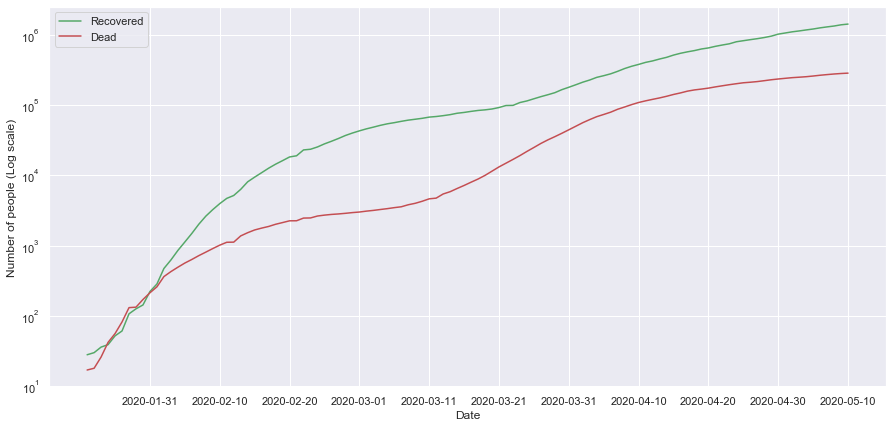

In [5]:
dates_death = pd.to_datetime( df.columns[3:])
dates_recov = pd.to_datetime( recov.columns[3:])

fig = plt.figure(figsize=(15,7))
sns.lineplot(x=dates_recov, y= recov.sum()[3:].astype(float), label='Recovered', c='g' );
sns.lineplot(x=dates_death, y=deaths.sum()[3:].astype(float), color='r' , label='Dead');
plt.yscale('log')

plt.ylabel('Number of people (Log scale)')
plt.xlabel('Date')

#Show some ticks
x_ticks = df.columns[:3:-10].tolist()
x_ticks
plt.xticks(x_ticks);

Currently when talking about death rate there is some tendency to compare the number of *people who died* with the number of *people who currently have the disease* but this is a nonsense meaning of death rate. 
Comparing these groups of people is like comparing the number of people who didn't win the lottery last month with the number of people who bought a ticket this month.

To know the real current risk of death we *must* compare the number of people who **already went through the illness** and *survived* with the number of people who *died* from the disease.

First let's get the total number of people who have had the illness:



 The current death percentage worlwide is 16.71% 


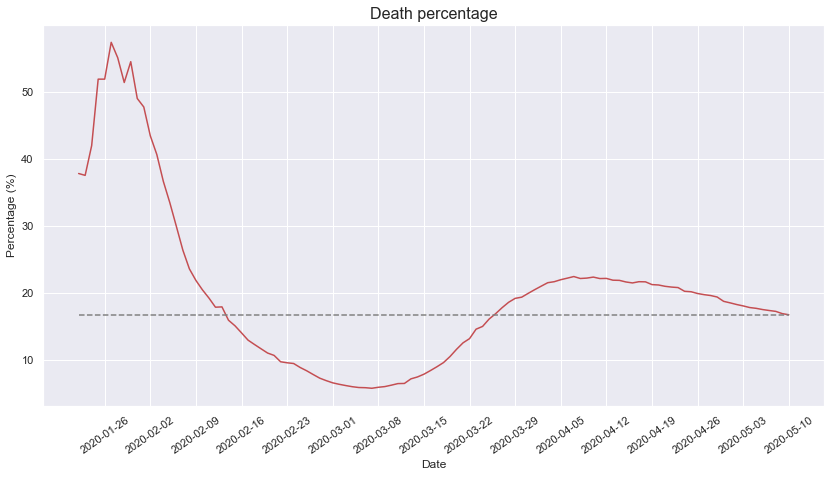

In [6]:
if  dates_death[-1]  > dates_recov[-1]:
    dates = dates_recov
else:
    dates = dates_death

done = deaths.sum()[3:(len(dates)+3)] + recov.sum()[3:(len(dates)+3)]
# sns.lineplot(x=dates, y=done.astype(float));

fig = plt.figure(figsize=(14,7))
death_percentages = 100 *(deaths.sum()[3:(len(dates)+3)].astype(float)/done.astype(float) )

print('\n\n The current death percentage worlwide is {:.2f}% '.format(death_percentages[-1]) )

sns.lineplot(x=dates, y=death_percentages[:len(dates)] , color='r')
plt.plot([dates[0], dates[-1] ],[death_percentages[-1], death_percentages[-1] ],  color='grey', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.title('Death percentage', size=16)
#Show some ticks
x_ticks = df.columns[:3:-7].tolist()
plt.xticks(x_ticks, rotation=35);

This plot makes sense. At the beginning the percentage was so high because the first cases reported were the ones were people died. Later on, many tests were taken (thus raising the number of people to have had the disease and survived) and people were being treated properly. We might say that at the beginning this curve is not that helpful but later on, specially towards the end of the plot, this is a good measure of how many people diagnosed with the illness survives.  

I think this figure is one of the most important things to be considering these days: It tells us that when someone is diagnosed with COVID-19, the outcome seems dreadful. In some countries the outcome is almost a flip coin.
Notice how this percentage is completely different to that usually reported by the media! In many sources the number of dead people is usually compared to the **active cases**. That percentage sometimes **is being compared to that of flu!**

It is good to see that nowadays this curve is now **descending**.

### New cases

Here we take a look at worlwide daily new cases which may be denoted by $\Delta_{i+1,i}$ for the amount of new cases of day $i+1$.

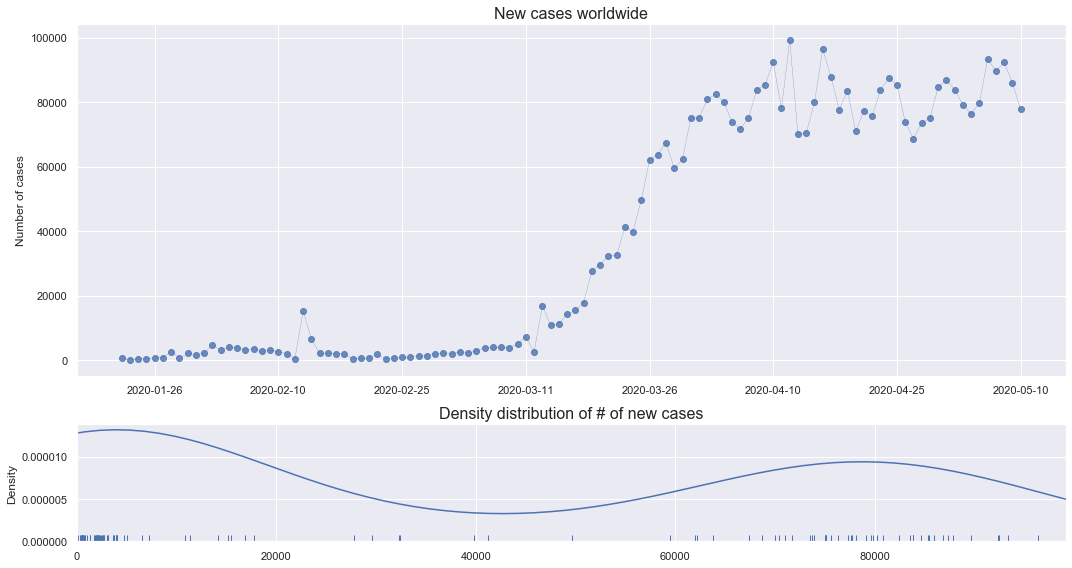

In [7]:
fig, ax = plt.subplots(2,1,figsize=(15,8), gridspec_kw={'height_ratios': [3, 1]})

prev = 0
l=[]
for i in df.sum()[3:].tolist():
    l.append(i-prev)
    prev=i

x_ticks = df.columns[:3:-15].tolist()

ax[0].plot(dates, l, marker='o', linewidth=0.3, alpha=.8);
ax[0].set_title('New cases worldwide', size=16)
ax[0].set_xticks(x_ticks);
ax[0].set_ylabel('Number of cases')



ax[1] = sns.distplot(l, rug=True, hist=False)#np.linspace(0,np.max(l),50 ) );
ax[1].set_title('Density distribution of # of new cases', size=16 );
ax[1].set_xlim(0, np.max(l) );
ax[1].set_ylabel('Density');
plt.tight_layout()


### Growing factor
Another important thing to keep track of is how the number of cases is growing.  
To do so we only have to get the daily difference of known cases.
The definition of growth is given by
$$g_{i+1,i} = \frac{\Delta_{i+1,i}}{\Delta_{i,i-1}},$$

where $\Delta_{i+1,i}$ is the amount of new cases of day $i+1$. 

Since China was the place where everything started, it differs so much in time from the rest of the world that I'll leave it out of the next graph.

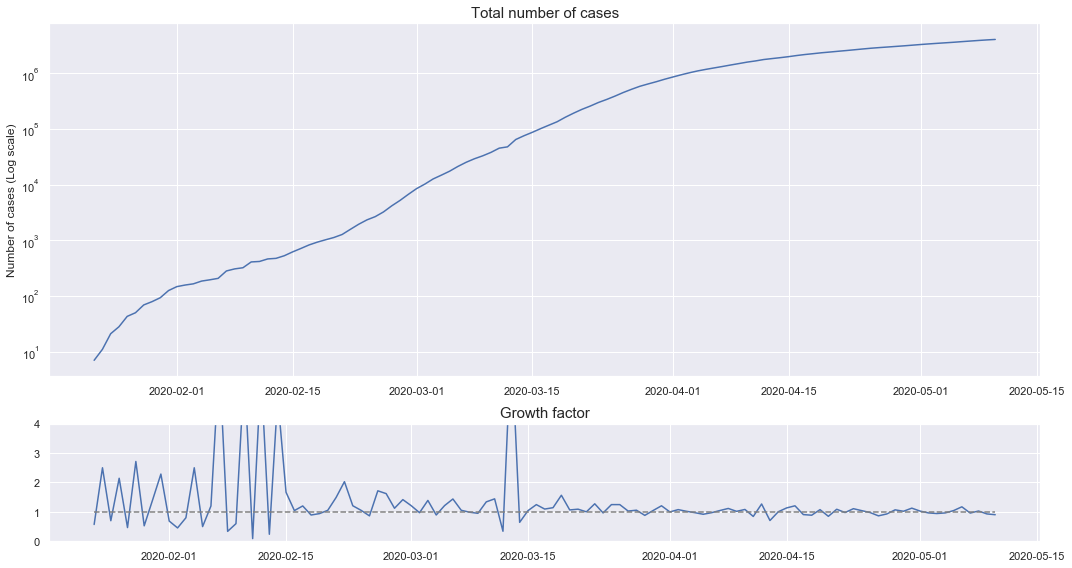

In [8]:
outchina = df[df.countryregion!='China']

# plt.plot(outchina.sum()[3:].tolist() )
# plt.yscale('log')

fig, ax = plt.subplots(2,1,figsize=(15,8), gridspec_kw={'height_ratios': [3, 1]})

prev = 0
l=[]
for i in outchina.sum()[3:].tolist():
    l.append(i-prev)
    prev=i
    
growth_dates = pd.to_datetime(outchina.columns[4:]);
growth=[]

ax[0].plot( pd.to_datetime(outchina.columns[3:]), outchina.sum()[3:] );
ax[0].set_yscale('log')
ax[0].set_title('Total number of cases', size=15)
ax[0].set_ylabel('Number of cases (Log scale)');

for i in range(len(l[:-1])):
    growth.append( l[i+1]/l[i] )
ax[1].plot(growth_dates, growth);
ax[1].set_title('Growth factor', size=15)
ax[1].plot([growth_dates[0], growth_dates[-1] ],[1, 1],  color='grey', linestyle='--')
ax[1].set_ylim(ymax = 4, ymin =0);
plt.tight_layout()

Whenever this last plot is below 1 it means that the number of new cases decreases, which is the ultimate objective of any nation.

### Weekends

It might just be that since people usually take a break from work on the weekends, the number of cases reported on Saturday and Sunday (and perhaps Monday) is relatively low. 



 Take into account that the last day these number numbers were refreshed was on a Sun 

In the last 24 hours there have been 77690 reported cases


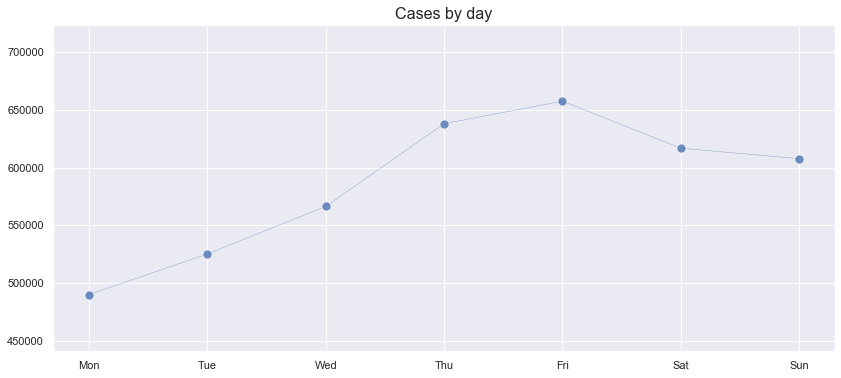

In [9]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
print('\n Take into account that the last day these number numbers were refreshed was on a {} \n'.format(weekdays[pd.to_datetime(df.columns[-1]).dayofweek] ))

prev = 0
newcases=[]
totalcases = df.sum()[3:].astype(float)
for i in totalcases.tolist():
    newcases.append(i-prev)
    prev=i
    
print('In the last 24 hours there have been {:.0f} reported cases'.format(newcases[-1]))
casesbyday = [0 for i in range(7)]
for i, totday in enumerate(casesbyday):
    casesbyday[i] = np.sum(newcases[i::7])

# We need to account for the fact that the first day we start counting is a Wednesday.
casesbyday = casesbyday[-2:] + casesbyday[:-2]
fig = plt.figure(figsize=(14,6))
sns.lineplot(x=[i for i in range(7)], y=casesbyday, alpha=.8, marker='o', markersize=9, linewidth=.35)

plt.title('Cases by day', size = 16)
plt.xticks([i for i in range(7)], weekdays)
plt.ylim(ymin=.9*np.min(casesbyday), ymax = (1.1 * np.max(casesbyday) ) );
plt.show()
# for i, number in enumerate(casesbyday):
#     print(' {} has a total of {:.0f} \n'.format(weekdays[i], number ))


The first day to start counting was a Wednesday but this doesn't seem to affect.
It seems like even if **over the weekends** the number of cases reported is lower it is not significantly lower than other days. However, the low numbers reported on the database on Mondays correspond to the data gathered on Sunday. 
This might be an indicator that also on the COVID crisis countries still slow down on the weekends.

### Countries comparison

In physics when comparing the evolution of two different variables it is often not a good idea to plot *everything* with respect to a linear time variable, after all, a virus doesn't really care if it is 10 of February or 15 of March. 
However, it is often better to take time intervals or start running our time variable after a signal to be able to compare slightly better two different systems. 

In the next plot we will not even use a time variable, we will use the total number of cases on the x-axis (although it indirectly depends on time, of course) and compare it to the number of new cases. 
This tells us in which stage each country is:
The red dot indicating their current position on the plot will let us know if the
countries are undergoing exponential growth in the number of cases (they will be shown on roughly the same straight line).
Countries that have "left" such line are now doing much better.


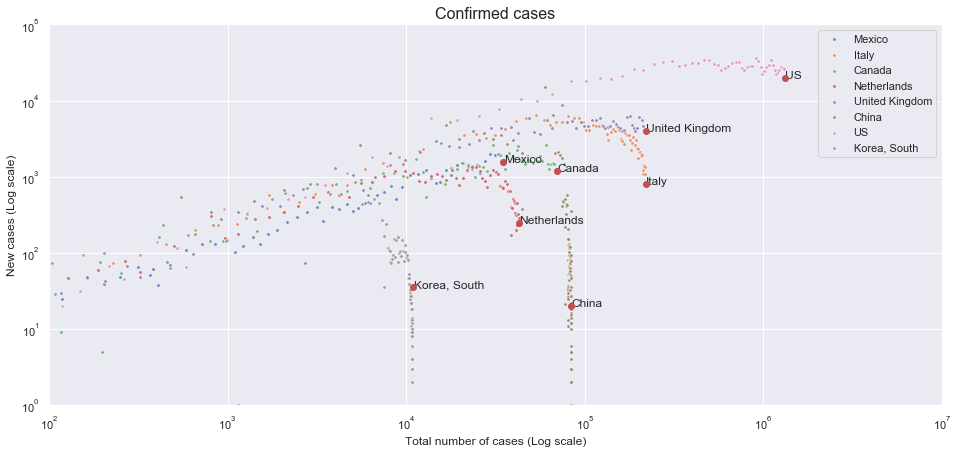

In [14]:
# Plot comparing several countries
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
for country in ['Mexico', 'Italy', 'Canada', 'Netherlands', 'United Kingdom', 'China', 'US', 'Korea, South']:
    prev = 0
    newcases=[]
    for i in df[df.countryregion==country].sum()[3:].tolist():
        newcases.append(i-prev)
        prev=i

    x =  df[df.countryregion==country].sum()[3:].astype(float)
    y = newcases

    sns.scatterplot(x=x, y= y, marker='o', s=13 , alpha=.8, label=country);
    plt.scatter(x=x[-1], y= y[-1], marker='o',  color='r', zorder=10);
    ax.text(x[-1]+220,y[-1], country, size=12 , zorder=5);
    
                

plt.xlabel('Total number of cases (Log scale)')
plt.ylabel('New cases (Log scale)')
plt.title('Confirmed cases', size=16)    

plt.xlim(xmin=100, xmax = 10e6)
plt.ylim(ymin=1, ymax = 10e4)
plt.yscale('log')
plt.xscale('log')
plt.show()